In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fresco.potentials import NUwU
from fresco.optimize import LBFGS_CPP
from fresco.utils import export_structure

In [2]:
N = 10000         # Number of points
ndim = 2          # Dimensions
L = np.ones(ndim) # 1x1 square box
c = np.ones(N)    # relative weighting of points
x0 = np.random.random(N*ndim) # Random initial positions

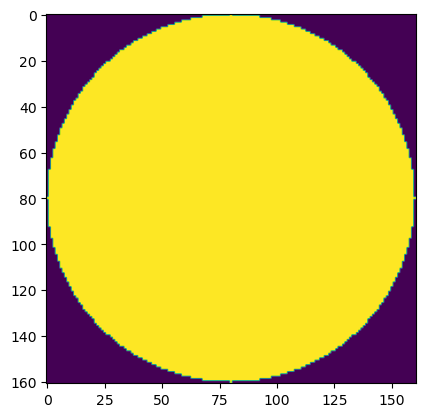

In [3]:
K = 80           # Limit of k-space we are looking at

# Create array of k-vector magnitudes
Kvec = np.arange(-K,K+1).reshape((1,-1))
Kmag = np.sqrt(Kvec**2 + (Kvec**2).T)

# Create the mask of k-vectors to be constrained
Kmask = np.array(Kmag <= K,dtype=np.int32)

fig = plt.figure()
ax = fig.gca()
ax.imshow(Kmask)
plt.show()

In [4]:
# Create the array of structure factor values corresponding to the k-vectors to be constrained
Sk = np.zeros(Kmag.shape)

# Create the weighting function
wk = Kmask

# Don't constrain the trivial peak at S(k=0)
center = int(Kmask.shape[0]/2)
wk[center,center] = 0

In [5]:
loss = NUwU(c, K, Sk, wk, L) # Initialize loss function
minimizer = LBFGS_CPP(x0, loss, iprint=100) # Initialize minimizer

In [6]:
# Run the minimization
minimizer.run(1000)
res = minimizer.get_result()
x = np.array(res.coords)

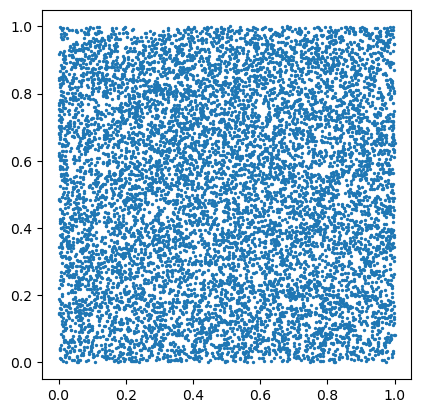

In [7]:
points = x.reshape(-1,ndim)

fig = plt.figure()
ax = fig.gca()
ax.scatter(points[:,0], points[:,1], s=2)
ax.set_aspect('equal')
plt.show()

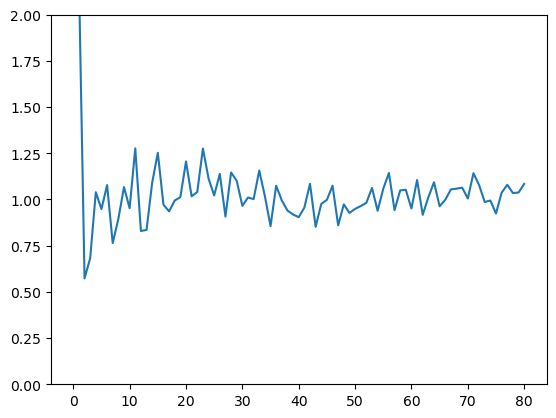

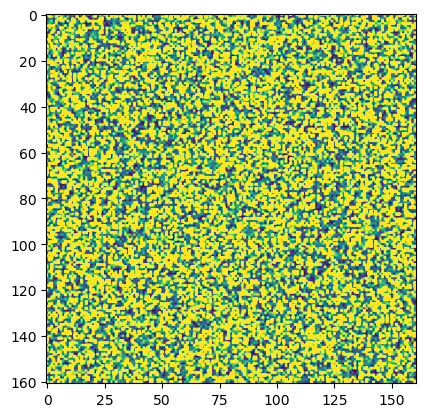

In [8]:
q,S,Sk,r,g, gr = export_structure(points,L, Nk = 2*K+1)

fig = plt.figure()
ax = fig.gca()
ax.plot(q, S)
ax.set_ylim(0,2)
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.imshow(Sk,vmin=0,vmax=1)
plt.show()